In [67]:
import pandas as pd
import  xlrd
#read excel
df =pd.read_csv('data/CreditCard.csv')
#head - 1st 5 rows
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [68]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [80]:
#Missing value check
df.isnull().sum()
#No null values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [70]:
#No mising values values 

In [81]:
#Duplicate check ,
df.duplicated().sum()

0

In [82]:
#24 duplicates so remove it
df = df.drop_duplicates()
#Duplicate again check and ensure those removed
df.duplicated().sum()

0

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [83]:
df = df.astype(int)

In [77]:
df_back=df.copy()
#df=df.drop(labels=["Delivery_person_ID",  "ID"],axis=1)
#df.tail()
#df.sample(5)

In [84]:
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print(categorical_columns)
print(numerical_columns)

Index([], dtype='object')
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [86]:
#df[categorical_columns].describe()

In [87]:
df[numerical_columns].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [89]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Empty DataFrame


In [90]:
df[numerical_columns].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int32
 1   LIMIT_BAL                   30000 non-null  int32
 2   SEX                         30000 non-null  int32
 3   EDUCATION                   30000 non-null  int32
 4   MARRIAGE                    30000 non-null  int32
 5   AGE                         30000 non-null  int32
 6   PAY_0                       30000 non-null  int32
 7   PAY_2                       30000 non-null  int32
 8   PAY_3                       30000 non-null  int32
 9   PAY_4                       30000 non-null  int32
 10  PAY_5                       30000 non-null  int32
 11  PAY_6                       30000 non-null  int32
 12  BILL_AMT1                   30000 non-null  int32
 13  BILL_AMT2                   30000 non-null  int32
 14  BILL_A

In [ ]:
df[categorical_columns].describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [97]:
#Unique values of categorical columns 
for i in numerical_columns:
    print(i,':',df[i].unique())


ID : [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL : [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX : [2 1]
EDUCATION : [2 1 3 5 4 6 0]
MARRIAGE : [1 2 3 0]
AGE : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0 : [ 2 -1  0 -2  1  3  4  8  7  5  6]
P

In [ ]:
#Replace ? with most occuring item
#df['workclass']  = df['workclass'].str.replace("?","Private")
#df['occupation']  = df['occupation'] .replace("?","Prof-specialty")
#df['native-country']  = df['native-country'] .replace("?","United-States")


 

C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_19944\1451715225.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['workclass']  = df['workclass'].str.replace("?","Private")


In [96]:
#Confirm the '? ' replaces with most occuring 
#for i in categorical_columns:
 #   print(i,':',df[i].unique())

In [ ]:
#confirmed all ? replaced with mostly occuring char

In [ ]:
#'NAN' is coming a value in many categories,so we will replace this with most occuering value
#df[categorical_columns]  = df[categorical_columns].replace("?","<br>")
#df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0]) 

In [92]:
#Now  double checking categories unique method & ensuring 'NAN' replaced
#Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df[i].unique())

In [ ]:
#Store clean data 
"""
import os
clean_csv=os.path.join('data','adult_clean.csv')
#column name correcting 
dict = {'education-num': 'education_num',
        'marital-status': 'marital_status',
        'capital-gain': 'capital_gain',
		'capital-loss': 'capital_loss',
		'hours-per-week': 'hours_per_week',
		'native-country': 'native_country',
		'class': 'Class',
		}
 
# call rename () method
df.rename(columns=dict,         inplace=True)

#df.sample(10)
df.to_csv(clean_csv,index=False)
#Testing the stored csv
df1=pd.read_csv(clean_csv)
print('Just double check the stored dataframe by reading it  #######\n',df.head(5))

"""

Just double check the stored dataframe by reading it  #######
    age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country   Class  
0    

In [95]:
import os
clean_csv=os.path.join('data','CreditCardClient_clean.csv')
df.to_csv(clean_csv,index=False)
#Testing the stored csv
df1=pd.read_csv(clean_csv)
print('Just double check the stored dataframe by reading it  #######\n',df.head(5))

Just double check the stored dataframe by reading it  #######
    ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  

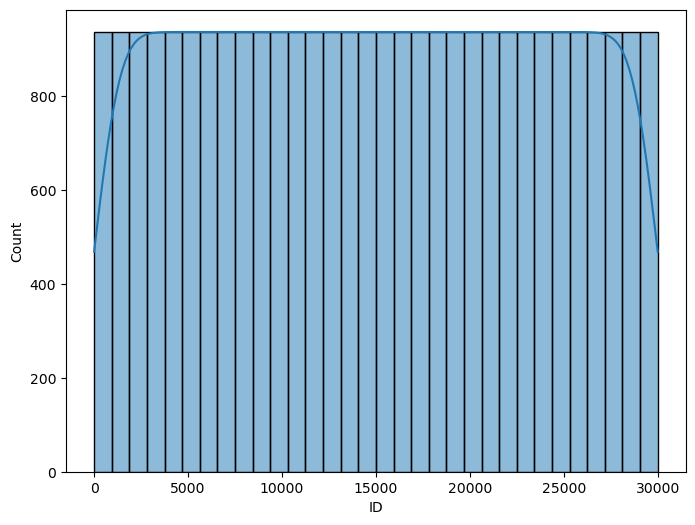

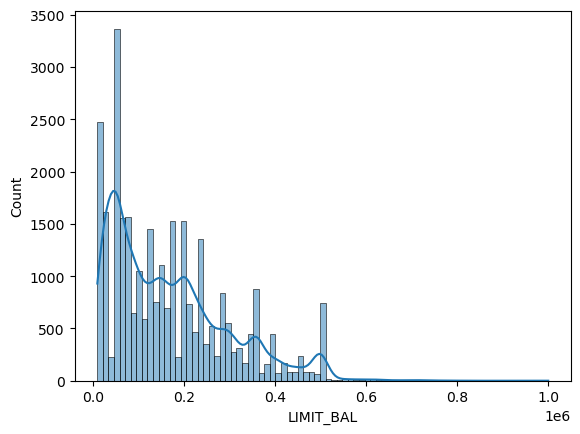

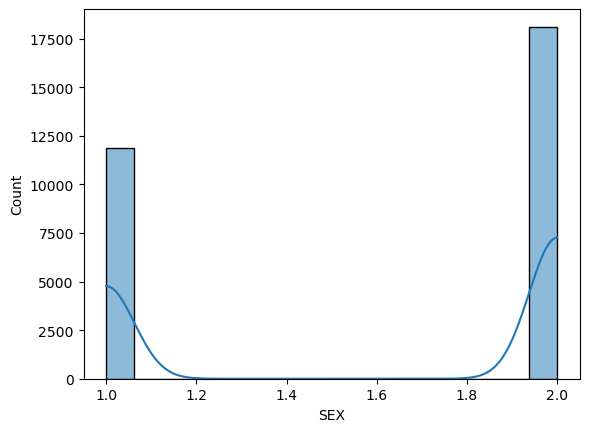

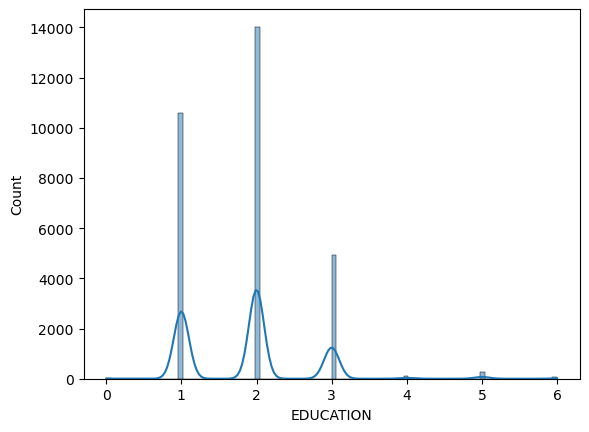

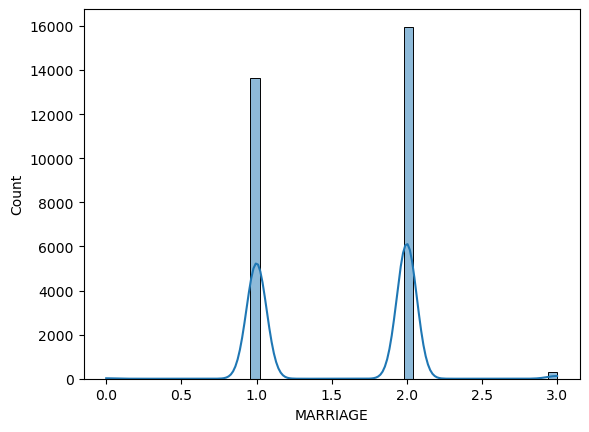

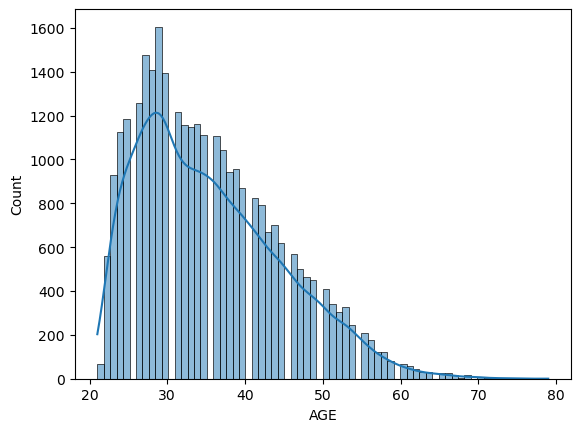

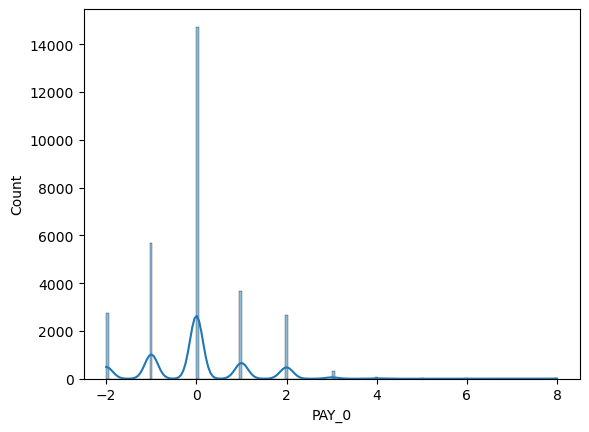

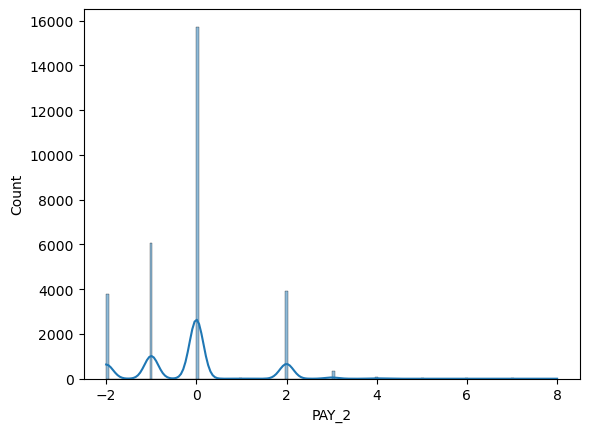

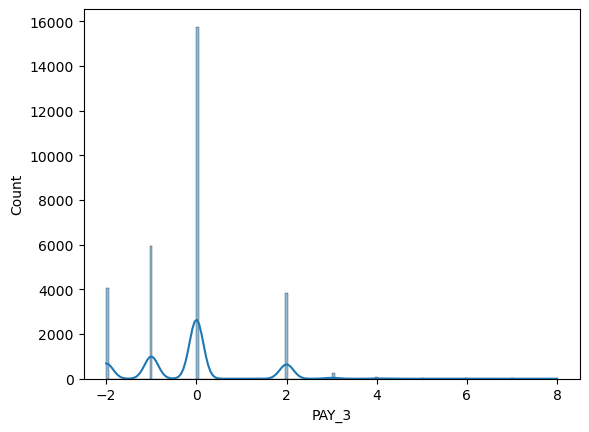

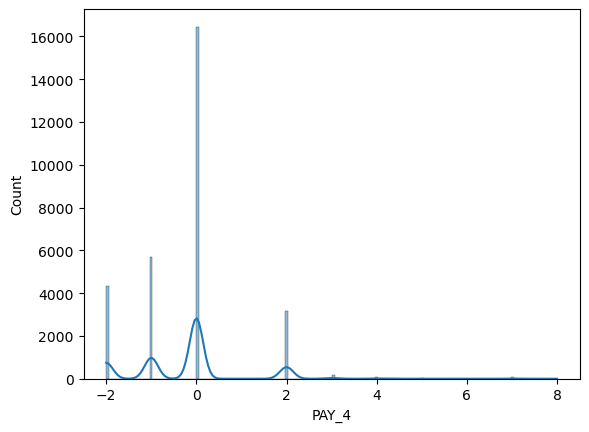

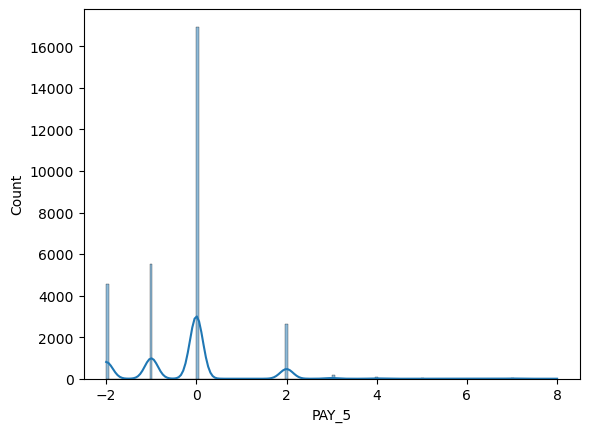

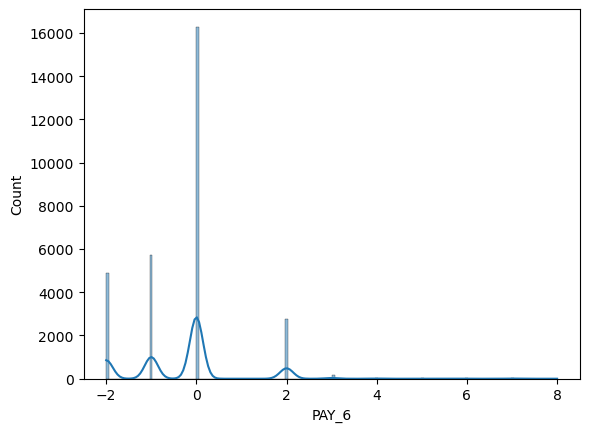

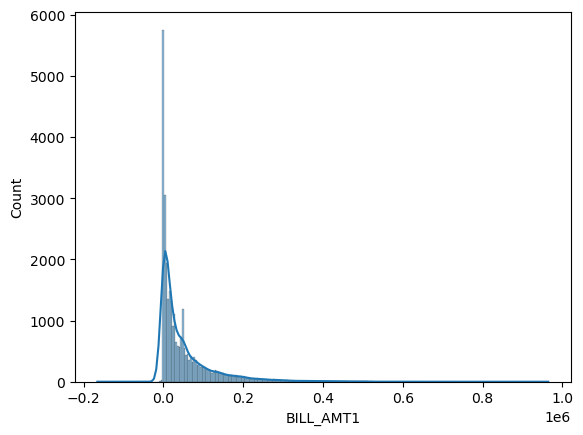

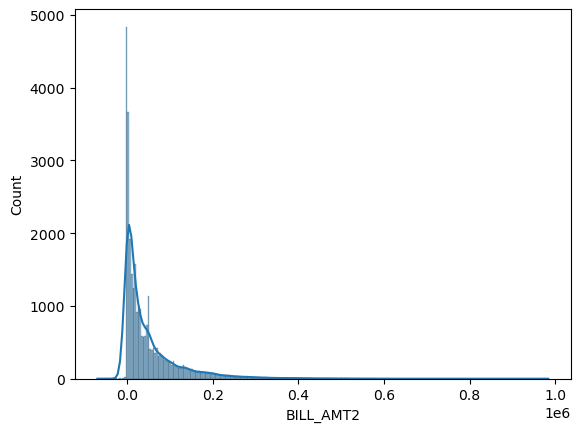

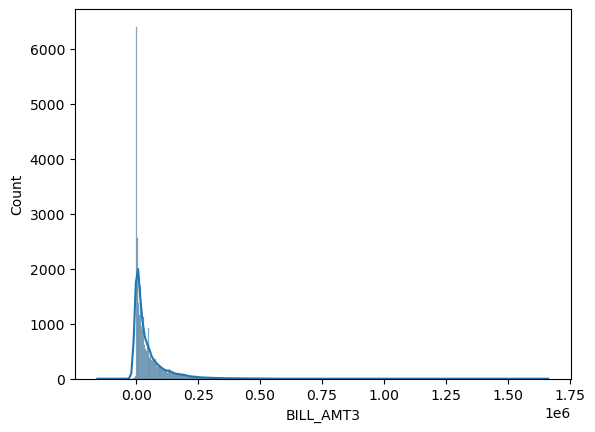

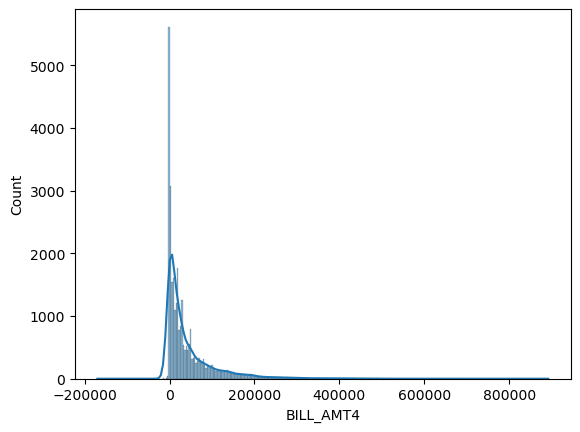

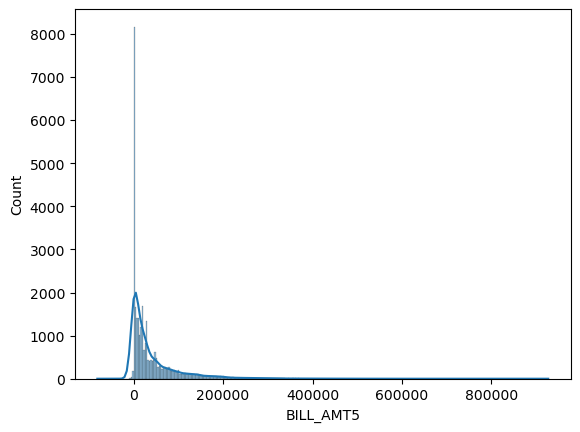

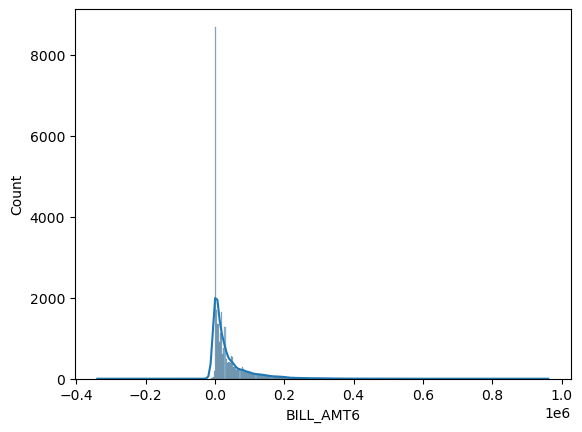

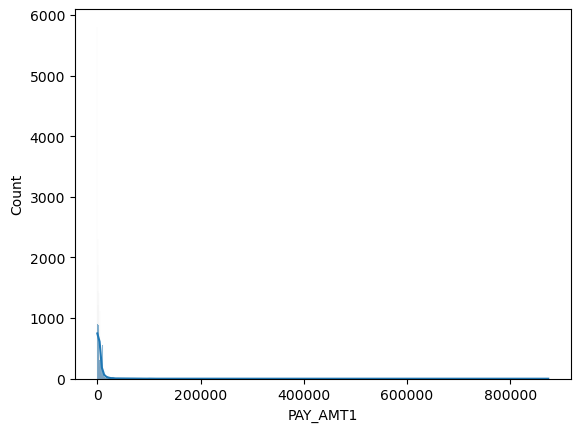

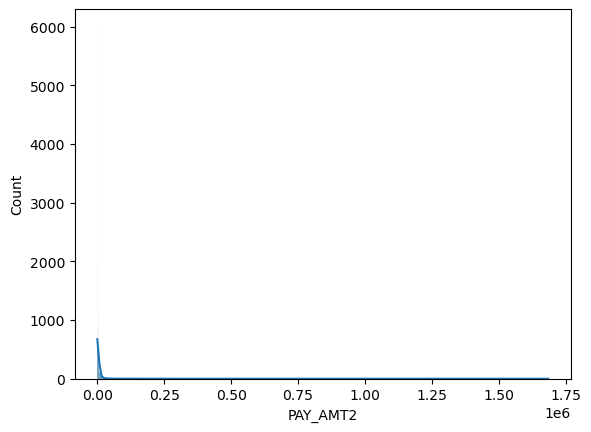

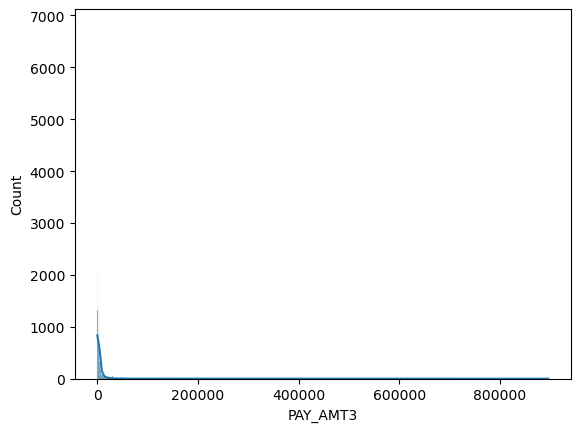

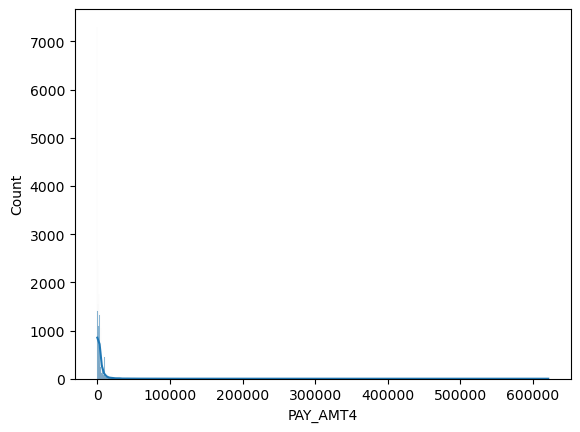

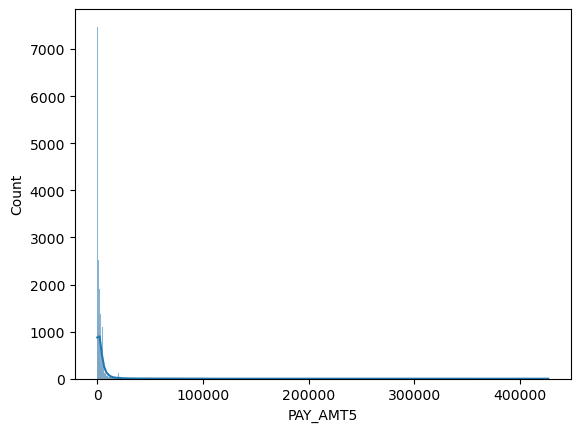

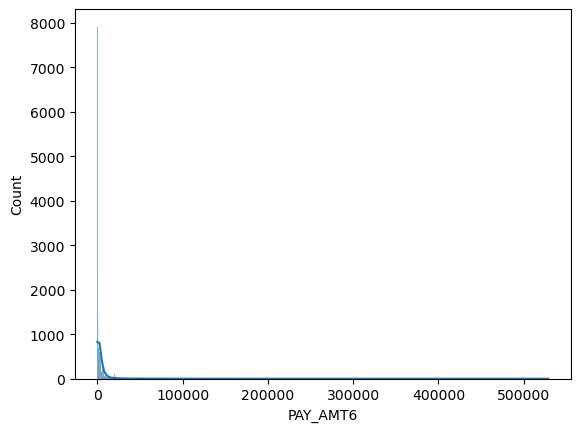

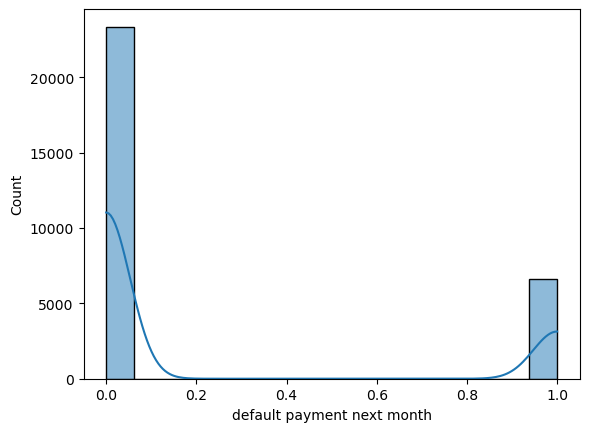

In [93]:
#Histogram for numerical  columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [94]:
#Categorical Plots
"""
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x =i, data = df)
    print('\n')
    plt.show()
    """

"\nfor i in categorical_columns:\n    plt.figure(figsize=(5,5))\n    sns.countplot(x =i, data = df)\n    print('\n')\n    plt.show()\n    "

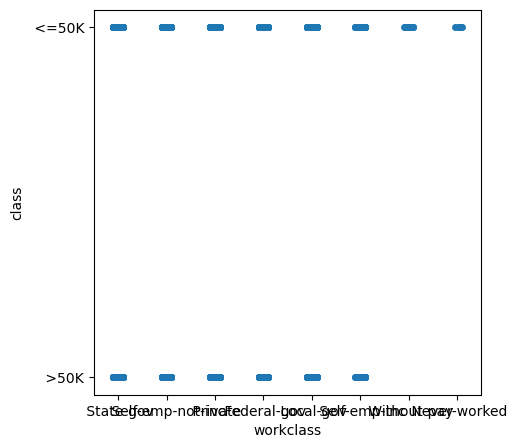

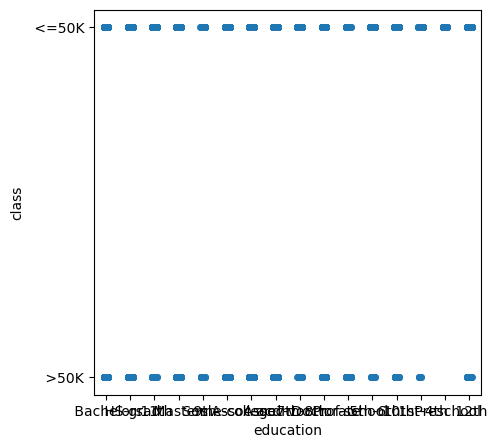

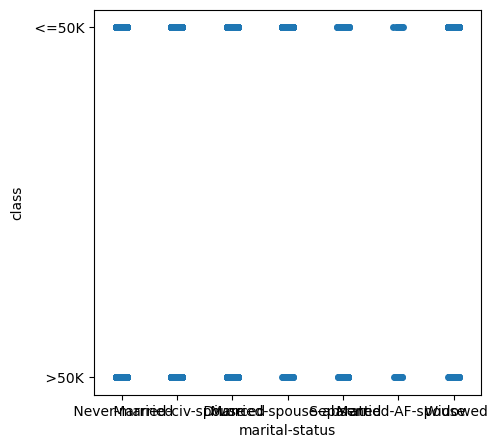

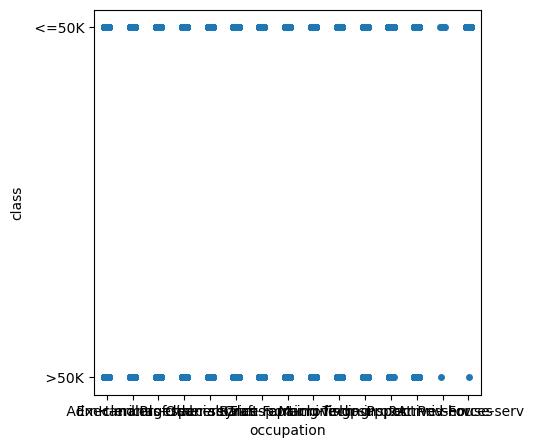

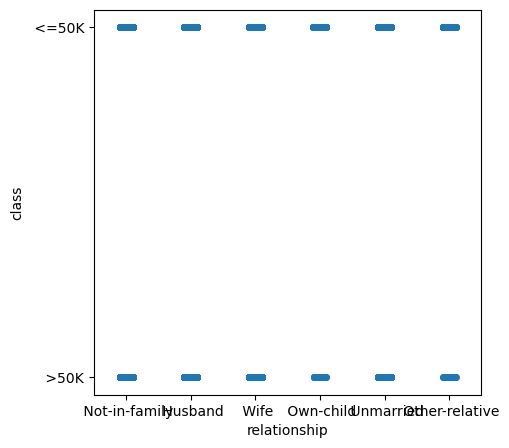

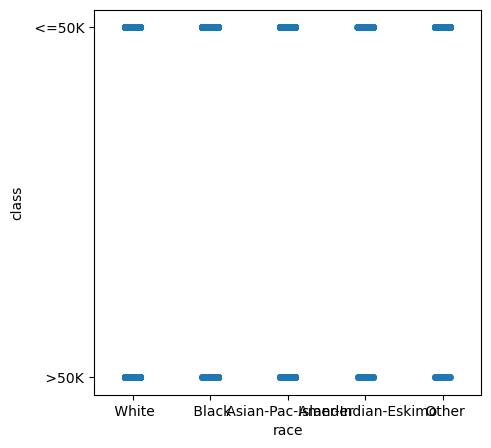

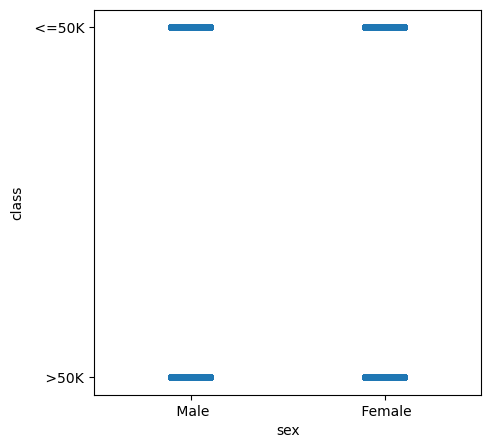

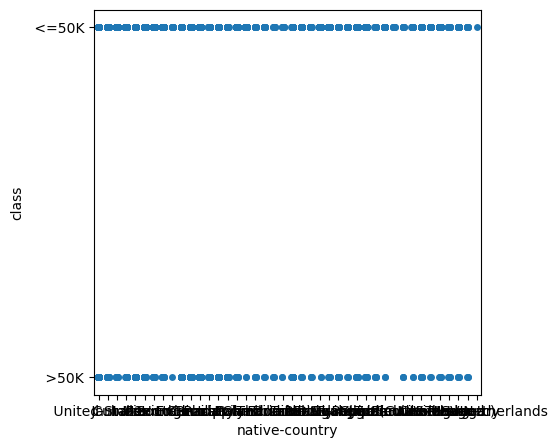

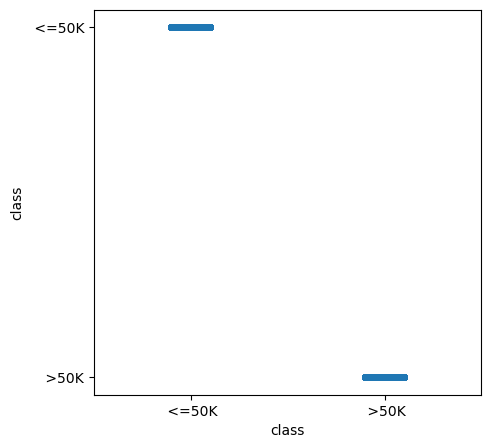

In [ ]:
#Strip plot - categorical columns
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(x =i, y ='class', data = df, jitter = True, dodge = True)
    print('\n')
    plt.show()

In [ ]:
#correlation
#sns.heatmap(df.corr(),annot=True)
#df.corr()
categorical_columns


Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [ ]:
#df['cut'].value_counts()

KeyError: 'cut'

In [ ]:
#cur_map={'Ideal':1,'Premium':2,'Very Good':3,'Good':4,'Fair':5}
#df['color'].value_counts()

In [ ]:
##color_map={'G':1,'E':2,'F':3,'H':4,'D':5,'I':6,'J':7}
#df['clarity'].value_counts()

In [ ]:
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['color'].unique()
color_map= {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
df['clarity'].unique()
color_map={"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}
clarity_map={"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [ ]:
#map the dict fpr the categories to df
#df['color']=df['color'].map(color_map)
#df['clarity']=df['clarity'].map(clarity_map)
#df['cut']=df['cut'].map(cut_map)

In [ ]:
df.head()

In [ ]:
#correlation
df.corr()

C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_7096\3302858938.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),Order_Day,Order_Month,Order_Year,Order_Hour,Order_Min,Order_Sec,Order_Pick_Hour,Order_Pick_Min,Order_Pick_Sec
Delivery_person_Age,1.000000,-0.067959,-0.004522,-0.009360,0.002501,-0.000507,0.003162,0.115904,0.299523,0.003176,-0.007115,NaN,-0.000506,-0.010875,-0.006180,0.004100,0.004086,-0.013047
Delivery_person_Ratings,-0.067959,1.000000,-0.007823,-0.014211,-0.010350,-0.013560,0.034592,-0.117631,-0.338814,-0.006710,-0.008129,NaN,-0.028894,0.009679,-0.001478,-0.037862,-0.004205,-0.006121
Restaurant_latitude,-0.004522,-0.007823,1.000000,0.661818,0.866369,0.602744,-0.033576,0.008091,0.013970,0.000043,-0.030781,NaN,0.059859,0.057404,0.009639,0.004545,-0.002767,0.001801
Restaurant_longitude,-0.009360,-0.014211,0.661818,1.000000,0.632335,0.915023,-0.038734,0.004438,0.007787,-0.001912,0.084327,NaN,0.050660,0.050626,0.002550,0.000055,-0.002407,0.004336
Delivery_location_latitude,0.002501,-0.010350,0.866369,0.632335,1.000000,0.690560,-0.001629,0.010325,0.014234,0.002296,-0.074500,NaN,0.002443,0.002409,0.004538,0.007686,-0.001403,0.002823
Delivery_location_longitude,-0.000507,-0.013560,0.602744,0.915023,0.690560,1.000000,-0.001946,0.004999,0.007590,-0.003325,0.087579,NaN,0.000106,0.002144,-0.002994,0.002073,-0.002806,0.002888
Vehicle_condition,0.003162,0.034592,-0.033576,-0.038734,-0.001629,-0.001946,1.000000,-0.097224,-0.234456,0.001028,0.002328,NaN,-0.056719,-0.053635,-0.000883,0.005098,0.008707,-0.003787
multiple_deliveries,0.115904,-0.117631,0.008091,0.004438,0.010325,0.004999,-0.097224,1.000000,0.387042,0.015731,-0.011346,NaN,0.033709,0.008837,0.011174,0.040098,0.007696,0.013987
Time_taken (min),0.299523,-0.338814,0.013970,0.007787,0.014234,0.007590,-0.234456,0.387042,1.000000,0.023974,-0.012285,NaN,0.097694,0.028065,0.022783,0.104353,0.026771,0.027629
Order_Day,0.003176,-0.006710,0.000043,-0.001912,0.002296,-0.003325,0.001028,0.015731,0.023974,1.000000,-0.325626,NaN,0.021541,0.001617,-0.000917,0.025004,0.007060,-0.002255


C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_7096\3119047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5)


<Axes: >

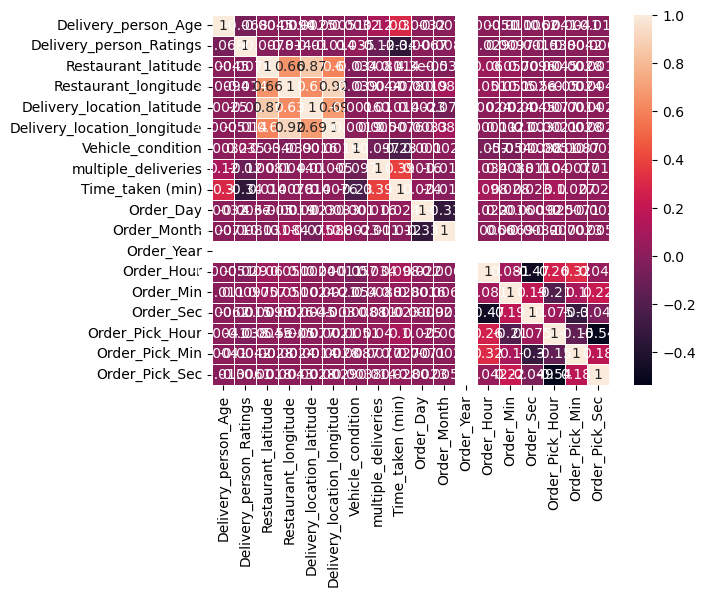

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True,linewidths=.5)